# Figure 4: Transitions between switching and non-switching strategies depend on environmental selectivity and environmental frequencies

Goal: show analytical results on when switching is optimal in temporally uncorrelated environments

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['transitions.mplstyle'])
import matplotlib
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']
black = matplotlib.rcParams['text.color']
width = matplotlib.rcParams['axes.linewidth']
from matplotlib import colors as mplcolors

import sys
sys.path.append('lib/')
import plotting
import evolimmune

/home/andreas/miniconda2/envs/transitions/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
/home/andreas/miniconda2/envs/transitions/lib/python2.7/site-packages/ipykernel/__main__.py:29: RuntimeWarning: divide by zero encountered in divide
/home/andreas/miniconda2/envs/transitions/lib/python2.7/site-packages/ipykernel/__main__.py:30: RuntimeWarning: divide by zero encountered in divide


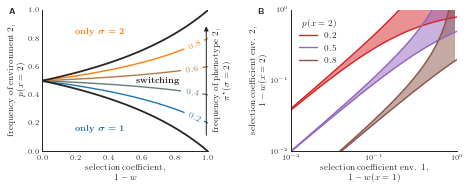

In [2]:
def func(pienv, s):
    return np.clip((pienv*(2.0-s) + s-1.0)/s, 0, 1)
    
s = np.linspace(0, 1)
fig, axes = plt.subplots(figsize=(6.6, 2.7), ncols=2)

ax = axes[0]
cmap = mplcolors.LinearSegmentedColormap.from_list('mycmap', [colors[0], colors[1]])
CS = ax.contour(func(s[:,None], s[None,:]), extent=(0, 1, 0, 1), cmap=cmap, levels=np.arange(0.2, 1.0, 0.2))
ax.clabel(CS, inline=1, fmt='%g', manual=[(0.9, 0.2), (0.9, 0.4), (0.9, 0.6), (0.9, 0.8)])
ax.plot(s, (1 - s)/(2 - s), color=black, lw=1.8)
ax.plot(s, 1/(2 - s), color=black, lw=1.8)
textkwargs = dict(ha='center', va='center')
ax.text(0.35, 0.85, r'\bf only $\bm{\sigma=2}$', color=colors[1], **textkwargs)
ax.text(0.35, 0.16, r'\bf only $\bm{\sigma=1}$', color=colors[0], **textkwargs)
ax.text(0.7, 0.5, r'\bf switching', color=black, **textkwargs)
arrowprops = dict(edgecolor=black, facecolor=black, arrowstyle='-|>', lw=width)
ax.annotate("", xy=(0.99, 0.9), xytext=(0.99, 0.1), arrowprops=arrowprops)
ax.text(1.03, 0.5, 'frequency of phenotype 2,\n'+r'$\pi^\star(\sigma=2)$', rotation=90,
        va='center', ha='left', multialignment='center')
ax.set_xlabel('selection coefficient,\n $1-w$')
ax.set_ylabel('frequency of environment 2,\n$p(x=2)$')

ax = axes[1]
s0 = np.logspace(-3, 0, 100)
ps = [0.2, 0.5, 0.8]
for i, p in enumerate(ps):
    l, = ax.plot(s0, s0/(s0+p/(1.0-p)), label='%g'%p, c=colors[i+3])
    ax.plot(s0, (s0/(1.0-s0))*((1.0-p)/p), c=l.get_color())
    ax.fill_between(s0, s0/(s0+p/(1.0-p)), (s0/(1.0-s0))*((1.0-p)/p), color=l.get_color(), alpha=.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.01, 1)
ax.set_ylim(0.01, 1)
ax.legend(title='$p(x=2)$', loc='upper left', ncol=1)
ax.set_xlabel('selection coefficient env. 1,\n$1-w(x=1)$')
ax.set_ylabel('selection coefficient env. 2,\n$1-w(x=2)$')

for ax in axes:
    plotting.despine(ax)
plotting.label_axes(axes, xy=(-0.2, 0.975))
fig.tight_layout(w_pad=4.0)
fig.savefig('svgs/iidswitching.svg')

**Transitions between switching and non-switching strategies depend on environmental selectivity and environmental frequencies.** In a temporally uncorrelated environment changing randomly between two states, $1$ and $2$, a population of organisms is adapted optimally by either being in a single phenotypic state or by having a mixture of phenotypes (bet-hedging) depending on the statistics of the environment and the degree to which the phenotypes are specialized. In environment $x=1$ ($2$) phenotype $2$ ($1$) has replication rate $w_x$ relative to the other phenotype.
(A) Transitions as a function of specialization level and environmental frequency in the symmetric case, $w_1 = w_2 = w$. The black lines mark the transition from single-phenotype to bet-hedging strategies: above the upper (lower) line the entire population optimally has phenotype 2 (1), between the two lines phenotypic diversification provides an advantage. The optimal fraction of phenotype $2$ in the bet-hedging region is shown by the colored lines.
(B) Regions of selection factors in which bet-hedging is the preferred strategy (shaded areas) for environments with different frequencies of being in state $2$. Either strong selection or a precise mapping between the relative selection factors and the relative environmental frequencies are needed to make bet-hedging optimal. 